In [6]:
from hamilton import driver, base
import dataflow, map_transforms

# Basic Driver Instantiation + Visualization

Pyspark is effectively the same as pandas dataframes -- you're welcome to use it however you would pyspark
Only difference is the with_columns decorator, which chains together UDFs while preserving lineage.

In this notebook we:
1. Instantiate a driver
2. Visualize execution
3. Capture the result (in pandas and pyspark)
4. Explain the execution plan in pyspark

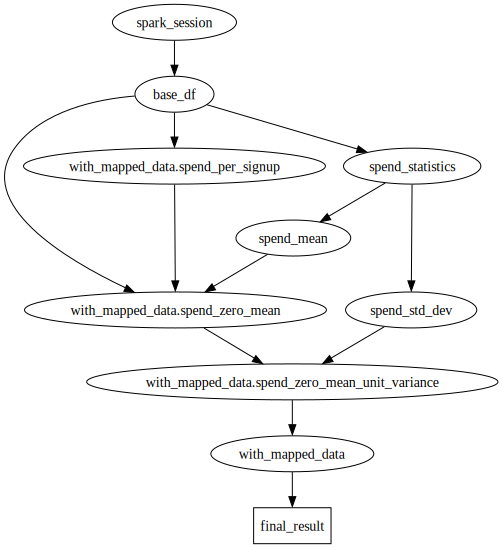

In [18]:
dr = driver.\
    Builder().\
    with_modules(dataflow, map_transforms).\
    with_adapter(base.DefaultAdapter()).\
    build()
dr.visualize_execution(["final_result"], "./out.png", {"format": "png"})

In [19]:
# get both the pandas result *and* the pyspark dataframes to examine
all_results = dr.execute(["final_result", "with_mapped_data"])
all_results["final_result"]

,spend,signups,spend_per_signup,spend_zero_mean,spend_zero_mean_unit_variance
0,10,1,10.000000,-72.0,-1.590827
1,10,10,1.000000,-72.0,-1.590827
2,20,50,0.400000,-62.0,-1.369879
3,40,100,0.400000,-42.0,-0.927982
4,40,200,0.200000,-42.0,-0.927982
5,50,400,0.125000,-32.0,-0.707034
6,60,600,0.100000,-22.0,-0.486086
7,70,800,0.087500,-12.0,-0.265138
8,90,1000,0.090000,8.0,0.176759
9,100,1200,0.083333,18.0,0.397707


In [21]:
# note that this only goes until the aggregation statistics, as we called `collect`
all_results["with_mapped_data"].explain("formatted")

== Physical Plan ==
* Project (3)
+- ArrowEvalPython (2)
   +- * Scan ExistingRDD (1)


(1) Scan ExistingRDD [codegen id : 1]
Output [2]: [spend#263L, signups#264L]
Arguments: [spend#263L, signups#264L], MapPartitionsRDD[49] at applySchemaToPythonRDD at NativeMethodAccessorImpl.java:0, ExistingRDD, UnknownPartitioning(0)

(2) ArrowEvalPython
Input [2]: [spend#263L, signups#264L]
Arguments: [spend_per_signup(signups#264L, spend#263L)#335, spend_zero_mean(spend#263L)#340, spend_zero_mean_unit_variance(spend_zero_mean(spend#263L)#340)#346], [pythonUDF0#353, pythonUDF1#354, pythonUDF2#355], 200

(3) Project [codegen id : 2]
Output [5]: [spend#263L, signups#264L, pythonUDF0#353 AS spend_per_signup#336, pythonUDF1#354 AS spend_zero_mean#341, pythonUDF2#355 AS spend_zero_mean_unit_variance#347]
Input [5]: [spend#263L, signups#264L, pythonUDF0#353, pythonUDF1#354, pythonUDF2#355]




In [23]:
all_results["with_mapped_data"].show()

+-----+-------+----------------+---------------+-----------------------------+
|spend|signups|spend_per_signup|spend_zero_mean|spend_zero_mean_unit_variance|
+-----+-------+----------------+---------------+-----------------------------+
|   10|      1|            10.0|          -72.0|                   -1.5908267|
|   10|     10|             1.0|          -72.0|                   -1.5908267|
|   20|     50|             0.4|          -62.0|                   -1.3698785|
|   40|    100|             0.4|          -42.0|                   -0.9279823|
|   40|    200|             0.2|          -42.0|                   -0.9279823|
|   50|    400|           0.125|          -32.0|                   -0.7070341|
|   60|    600|             0.1|          -22.0|                  -0.48608595|
|   70|    800|          0.0875|          -12.0|                   -0.2651378|
|   90|   1000|            0.09|            8.0|                   0.17675853|
|  100|   1200|     0.083333336|           18.0|    